In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [11]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
#model.add(BatchNormalization())
#model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))



In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [14]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [16]:
history=model.fit(traindata_generator,epochs=40,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/40
687/687 [==============================] - 33s 46ms/step - loss: 0.1708 - accuracy: 0.9436 - val_loss: 0.1750 - val_accuracy: 0.9414
Epoch 2/40
687/687 [==============================] - 35s 49ms/step - loss: 0.1772 - accuracy: 0.9417 - val_loss: 0.1987 - val_accuracy: 0.9404
Epoch 3/40
687/687 [==============================] - 32s 45ms/step - loss: 0.1779 - accuracy: 0.9402 - val_loss: 0.1865 - val_accuracy: 0.9359
Epoch 4/40
687/687 [==============================] - 30s 41ms/step - loss: 0.1907 - accuracy: 0.9387 - val_loss: 0.2060 - val_accuracy: 0.9306
Epoch 5/40
687/687 [==============================] - 27s 37ms/step - loss: 0.1730 - accuracy: 0.9427 - val_loss: 0.1836 - val_accuracy: 0.9410
Epoch 6/40
687/687 [==============================] - 28s 39ms/step - loss: 0.1678 - accuracy: 0.9465 - val_loss: 0.1925 - val_accuracy: 0.9397
Epoch 7/40
687/687 [==============================] - 25s 34ms/step - loss: 0.1746 - accuracy: 0.9414 - val_loss: 0.1739 - val_accuracy:

In [17]:
model.evaluate_generator(testdata_generator)[1]

C:\Users\ragha\AppData\Local\Temp\ipykernel_17916\2473289117.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(testdata_generator)[1]


0.9682096838951111

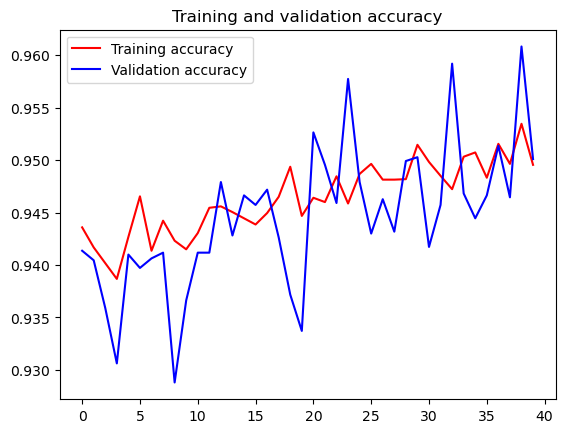

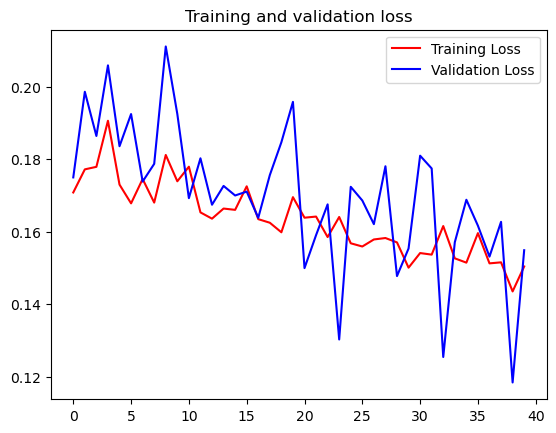

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.save('models/model3.h5')